## Examen parcial
Usar los métodos de ML no supervisado en: (k-means, Gaussian mixture, cluster jerárquico)
1. Dataset de Coactivation matrix
   * Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)
   * Usando el número de clusters encontrado por el método de codo, usar k-means y gaussian mixture en este dataset
2. Brain tumor
   * Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)
   * Utilizar 2 cluster con cada método (k-means, gaussian clusters y cluster jerárquico) y calcular la amatriz de confusión de cada método usando la columna 'Class' como groundthruth
   * ¿Qué método recomendarías para este dataset?, ¿por qué?
3. De su previa investigación
   * qué es precisión?
   * qué es accuracy?
   * qué es recall?
   * qué es f1-score?
4. Cómo se relacionan las definiciones anteriores a la matriz de confusión?
5. A partir del resultado de 2.B, calcular precision, accuracy, recall y f1-score

In [63]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import linkage, fcluster
import scipy.io
from mpl_toolkits.mplot3d import Axes3D

# Coactivation matrix

In [70]:
# Cargar los datos
mat_path = r'C:\Users\daphn\Documents\UNAM\Neurociencias\Quinto semestre 1\Modelos\Git\Neurociencias-2025-1\BCT\BCT\2019_03_03_BCT\data_and_demos\Coactivation_matrix.mat'
mat_data = scipy.io.loadmat(mat_path)

# Obtener la matriz de coactivación y las coordenadas
coactivation_matrix = mat_data['Coactivation_matrix']
coordinates = mat_data['Coord']

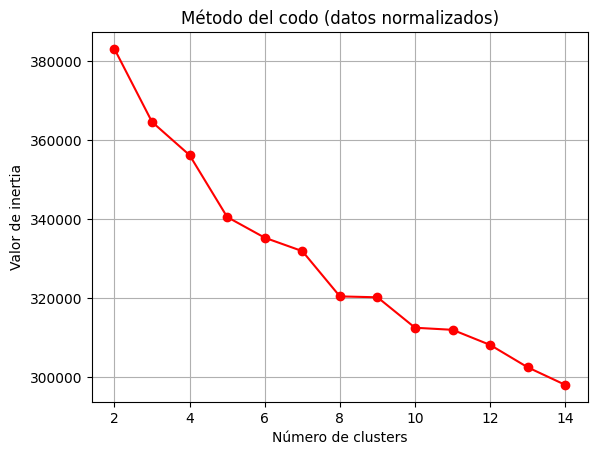

In [58]:
# Método del codo
x = df.iloc[:, :]
x_std = StandardScaler().fit_transform(x)

inertia = []
for no_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=no_clusters)
    kmeans.fit(x_std)
    inertia.append(kmeans.inertia_) # Calculamos el error para diferentes clusters

inertia = []
n_iter_= []
for no_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=no_clusters)
    kmeans.fit(x_std)
    inertia.append(kmeans.inertia_) # Calculamos el erro para diferentes clusters
    n_iter_.append(kmeans.n_iter_)

# Gráfica
plt.plot(range(2, 15), inertia, 'r-o')
plt.xlabel('Número de clusters')
plt.ylabel('Valor de inertia')
plt.title('Método del codo (datos normalizados)')
plt.grid(True)

In [64]:
# KMeans 3 clusters
kmeans = KMeans(n_clusters=3, tol=0.000001, random_state=42).fit(x_std)
labels_kmeans = kmeans.labels_

# Gaussian Mixture 3 clusters
gm = GaussianMixture(n_components=3, random_state=42).fit(x_std)
labels_gmm= gm.predict(x_std)

print('Kmeans con 3 clusters', labels_kmeans)
print('Gaussian mixture con 3 clusters', labels_gmm)

Kmeans con 3 clusters [2 2 2 2 2 0 0 1 2 2 2 2 0 2 2 2 1 2 0 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 1 0 2 0 1 0 1 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 1 1 2 2 1
 2 2 1 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 1 2 2 1 2 2 2 1 2 2 2 2 2 2
 2 2 2 2 2 1 2 1 2 2 1 2 2 1 1 1 2 1 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 1 2 2 2 2 2 1 2 2 1 2 0 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 0 1 0 0 0 2 1 2 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2
 1 1 1 1 1 2 2 1 1 1 1 2 1 2 2 2 1 2 1 2 1 1 1 1 2 1 1 1 2 2 2 2 1 1 2 2 2
 1 2 1 2 2 2 2 1 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 2 1 2 1 2 1 1 2 0 0 0
 0 0 0 0 0 0 0 0 2 0 2 2 2 0 0 0 2 0 2 2 2 2 0 0 0 2 0 1 1 0 1 1 2 1 0 0 0
 1 0 2 0 0 0 2 0 0 1 2 1 0 0 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 1 2 2 1 2 0 0 2 0 2 1 2 2 2 2 0 0 2 0 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0
 0 

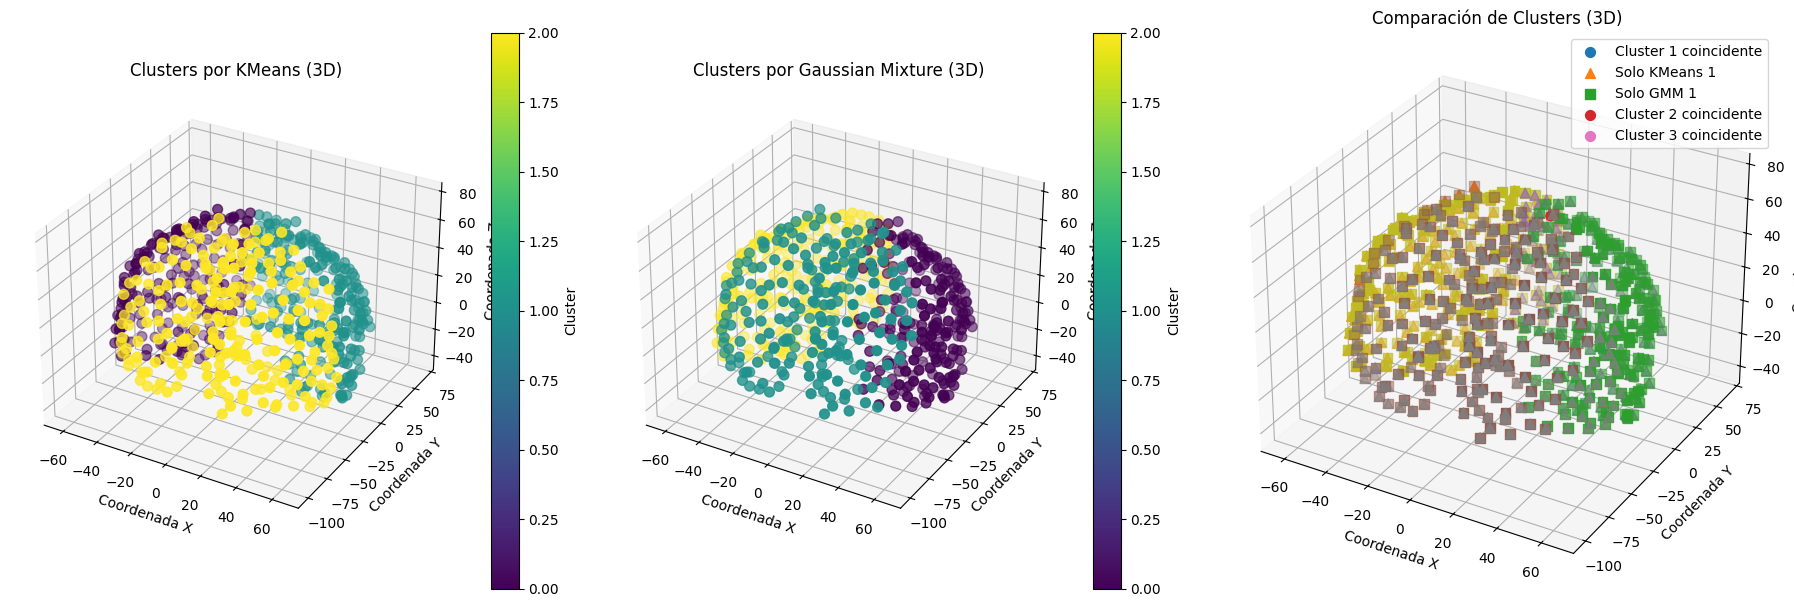

In [73]:
optimal_k = 3  

# KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(coordinates)

# Gaussian Mixture
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(coordinates)

# 2. Crear gráficas 3D
fig = plt.figure(figsize=(18, 6))

# Gráfica para KMeans
ax1 = fig.add_subplot(131, projection='3d')
scatter1 = ax1.scatter(coordinates[:,0], coordinates[:,1], coordinates[:,2], 
                      c=kmeans_labels, cmap='viridis', s=50)
ax1.set_title('Clusters por KMeans (3D)')
ax1.set_xlabel('Coordenada X')
ax1.set_ylabel('Coordenada Y')
ax1.set_zlabel('Coordenada Z')
plt.colorbar(scatter1, ax=ax1, label='Cluster')

# Gráfica para Gaussian Mixture
ax2 = fig.add_subplot(132, projection='3d')
scatter2 = ax2.scatter(coordinates[:,0], coordinates[:,1], coordinates[:,2], 
                      c=gmm_labels, cmap='viridis', s=50)
ax2.set_title('Clusters por Gaussian Mixture (3D)')
ax2.set_xlabel('Coordenada X')
ax2.set_ylabel('Coordenada Y')
ax2.set_zlabel('Coordenada Z')
plt.colorbar(scatter2, ax=ax2, label='Cluster')

# Gráfica comparativa (puntos iguales en ambos métodos)
ax3 = fig.add_subplot(133, projection='3d')
for i in range(optimal_k):
    # Puntos donde ambos métodos coinciden
    mask = (kmeans_labels == i) & (gmm_labels == i)
    ax3.scatter(coordinates[mask,0], coordinates[mask,1], coordinates[mask,2], 
               label=f'Cluster {i+1} coincidente', s=50)
    
    # Puntos donde difieren 
    mask_kmeans = (kmeans_labels == i) & (gmm_labels != i)
    mask_gmm = (gmm_labels == i) & (kmeans_labels != i)
    ax3.scatter(coordinates[mask_kmeans,0], coordinates[mask_kmeans,1], coordinates[mask_kmeans,2], 
               marker='^', label=f'Solo KMeans {i+1}' if i==0 else "", s=50)
    ax3.scatter(coordinates[mask_gmm,0], coordinates[mask_gmm,1], coordinates[mask_gmm,2], 
               marker='s', label=f'Solo GMM {i+1}' if i==0 else "", s=50)

ax3.set_title('Comparación de Clusters (3D)')
ax3.set_xlabel('Coordenada X')
ax3.set_ylabel('Coordenada Y')
ax3.set_zlabel('Coordenada Z')
ax3.legend()

plt.tight_layout()
plt.show()

# Brain tumor

In [6]:
path = r"C:\Users\daphn\Documents\UNAM\Neurociencias\Sexto Semestre\Modelos computacionales II\Neurociencias-2025-2\S03_datasets\Brain_tumor\Brain Tumor.csv"

df = pd.read_csv(path)

In [40]:
x = df.iloc[:, 2:-1]
x_std = StandardScaler().fit_transform(x) # Normalización

# Ground truth 
ground_truth = df['Class']

# Método del codo con datos normalizados
inertia = []
for no_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=no_clusters)
    kmeans.fit(x_std)
    inertia.append(kmeans.inertia_) # Calculamos el error para diferentes clusters

inertia = []
n_iter_= []
for no_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=no_clusters)
    kmeans.fit(x_std)
    inertia.append(kmeans.inertia_) # Calculamos el erro para diferentes clusters
    n_iter_.append(kmeans.n_iter_)

# Método del codo con datos no normalizados
inertia2 = []
for no_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=no_clusters)
    kmeans.fit(x)
    inertia2.append(kmeans.inertia_) # Calculamos el error para diferentes clusters

inertia2 = []
n_iter2_= []
for no_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=no_clusters)
    kmeans.fit(x)
    inertia2.append(kmeans.inertia_) # Calculamos el error para diferentes clusters
    n_iter2_.append(kmeans.n_iter_)

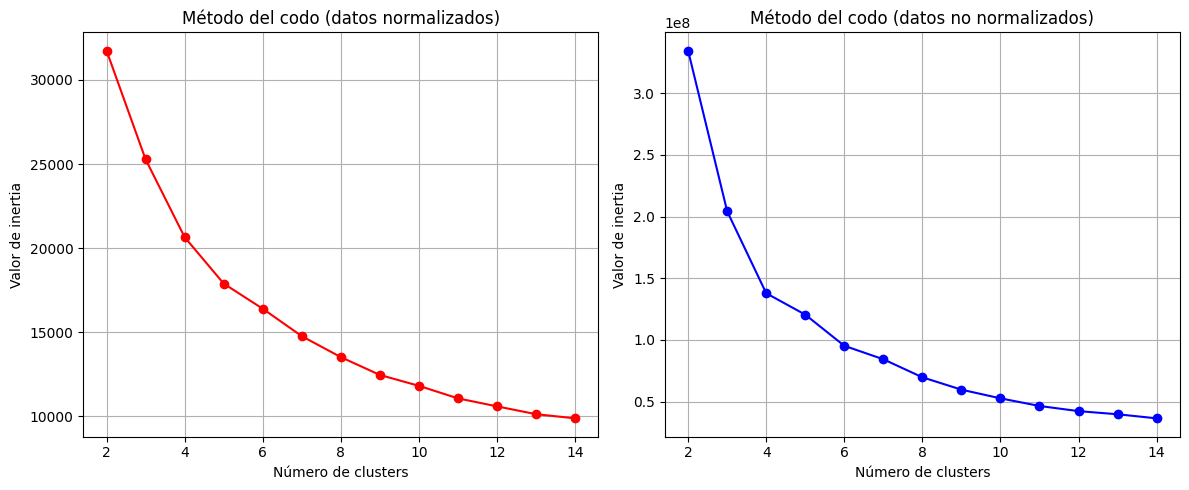

In [32]:
plt.figure(figsize=(12, 5))  

# Primer subplot (normalizados)
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
plt.plot(range(2, 15), inertia, 'r-o')
plt.xlabel('Número de clusters')
plt.ylabel('Valor de inertia')
plt.title('Método del codo (datos normalizados)')
plt.grid(True)

# Segundo subplot (no normalizados)
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
plt.plot(range(2, 15), inertia2, 'b-o')
plt.xlabel('Número de clusters')
plt.ylabel('Valor de inertia')
plt.title('Método del codo (datos no normalizados)')
plt.grid(True)

plt.tight_layout()  # Ajusta automáticamente los espacios entre subplots
plt.show()

Al final considero que de 4 a 6 clusters podrían funcionar a partir de la gráfica con datos no normalizados ya que sentí que me daba más información y había picos más marcados, eso si los datos sirve para que se dividan así pero se supone que para brain tumor solo debería de dividirse en 2 porque es o tienes un tumor o no tumor, a menos que tomemos en cuenta los falsos positivos. 

In [34]:
# KMeans 2 clusters
kmeans = KMeans(n_clusters=2, tol=0.000001, random_state=42).fit(x_std)
labels_kmeans = kmeans_4.labels_

# Gaussian Mixture 2 clusters
gm = GaussianMixture(n_components=2, random_state=42).fit(x_std)
labels_gmm= gm.predict(x_std)

# Jerárquico 2 clusters
Z = linkage(x_std, 'ward')
labels_hier = fcluster(Z, t=2, criterion='maxclust') 

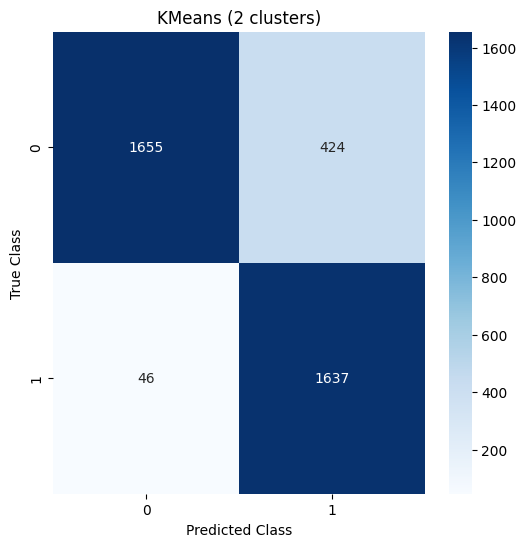

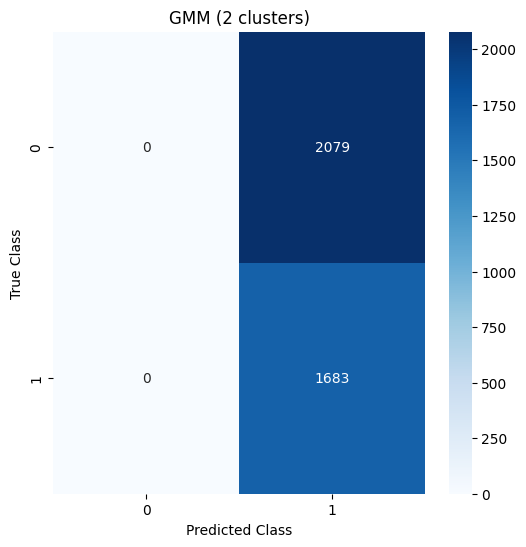

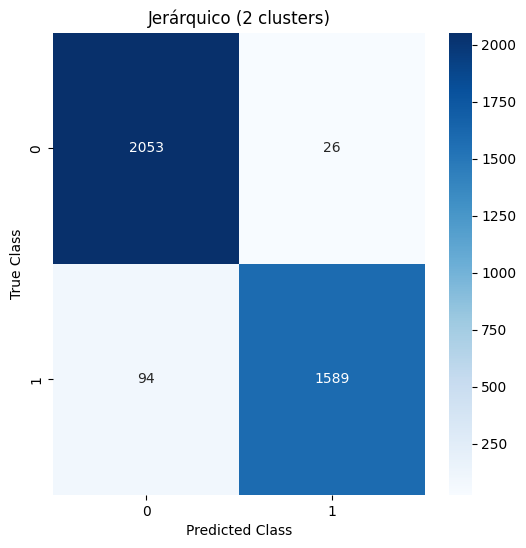

In [38]:
from scipy.optimize import linear_sum_assignment
# Crear DataFrame con resultados 
results_df = pd.DataFrame({
    'True_Class': ground_truth,
    'KMeans': labels_kmeans,
    'GMM': labels_gmm,
    'Hier': labels_hier
})

# Función para mapear clusters
def map_clusters_to_classes(cluster_labels, true_labels):
    cluster_classes = []
    for cluster in np.unique(cluster_labels):
        class_counts = np.bincount(true_labels[cluster_labels == cluster])
        cluster_classes.append(np.argmax(class_counts))  
    return {cluster: cluster_classes[i] for i, cluster in enumerate(np.unique(cluster_labels))}

# Función para mostrar matrices como prefieres
def plot_simple_cm(true, pred, title):
    cm = confusion_matrix(true, pred, labels=np.unique(true))
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()
def map_6_to_2_clusters(cluster_labels, true_labels):
    cluster_classes = []
    for cluster in np.unique(cluster_labels):
        class_dist = true_labels[cluster_labels == cluster].value_counts(normalize=True)
        cluster_classes.append(class_dist.idxmax())
    return {cluster: cluster_classes[i] for i, cluster in enumerate(np.unique(cluster_labels))}

# Matrices para cada método

# KMeans 4 clusters
kmeans4_map = map_clusters_to_classes(results_df['KMeans'], results_df['True_Class'])
results_df['KMeans_mapped'] = results_df['KMeans'].map(kmeans4_map)
plot_simple_cm(results_df['True_Class'], results_df['KMeans_mapped'], 'KMeans (2 clusters)')

# GMM 6 clusters
gmm6_map = map_6_to_2_clusters(results_df['GMM'], results_df['True_Class'])
results_df['GMM_mapped'] = results_df['GMM'].map(kmeans6_map)
plot_simple_cm(results_df['True_Class'], results_df['GMM_mapped'], 'GMM (2 clusters)')

# Clustering Jerárquico 6 clusters
hier6_map = map_6_to_2_clusters(results_df['Hier'], results_df['True_Class'])
results_df['Hier_mapped'] = results_df['Hier'].map(hier6_map)
plot_simple_cm(results_df['True_Class'], results_df['Hier_mapped'], 'Jerárquico (2 clusters)')


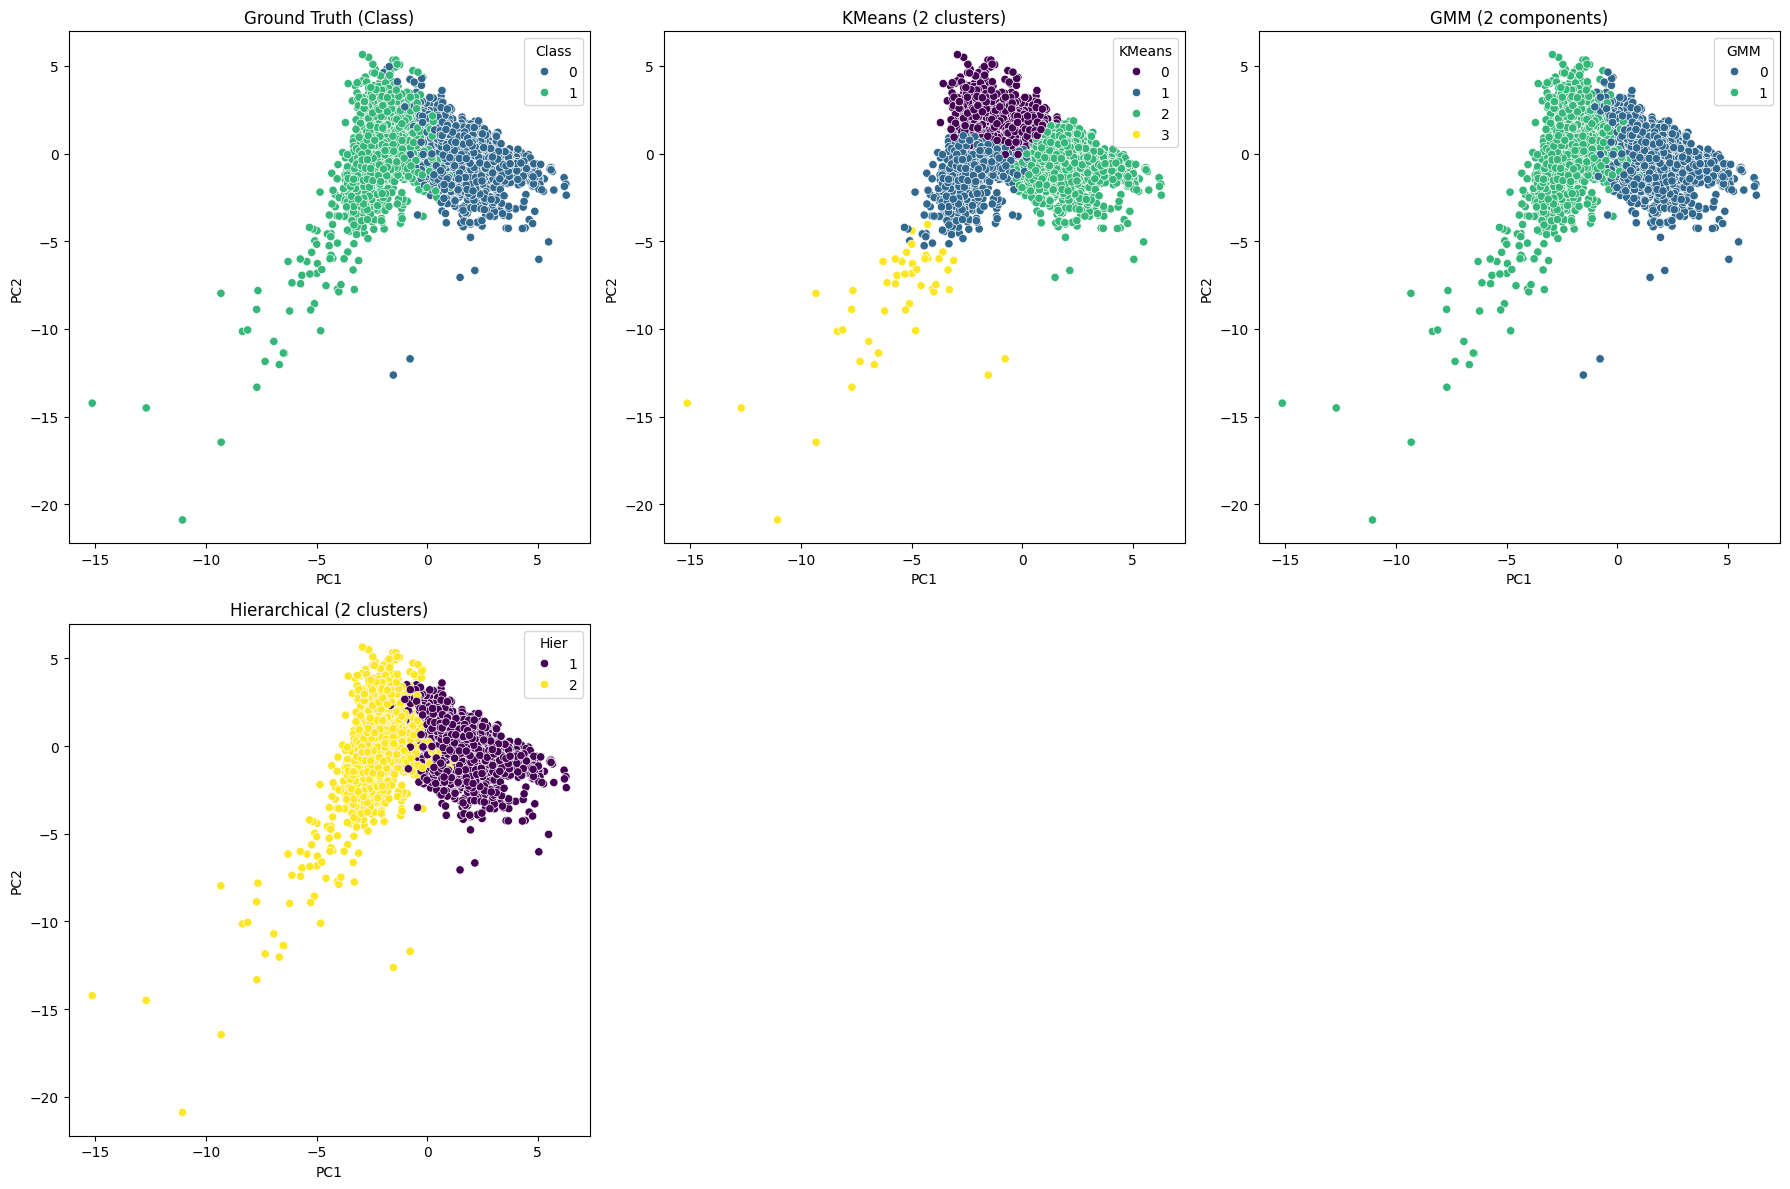

In [39]:
# Reducción a 2D para visualización
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_std)

# Crear DataFrame para facilitar el plotting
plot_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
plot_df['Class'] = ground_truth  # Con el ground_truth definido
plot_df['KMeans'] = labels_kmeans
plot_df['GMM'] = labels_gmm
plot_df['Hier'] = labels_hier

def plot_all_clusters(df):
    plt.figure(figsize=(18, 12))
    
    # Ground Truth
    plt.subplot(2, 3, 1)
    sns.scatterplot(data=df, x='PC1', y='PC2', hue='Class', palette='viridis')
    plt.title('Ground Truth (Class)')
    
    # KMeans
    plt.subplot(2, 3, 2)
    sns.scatterplot(data=df, x='PC1', y='PC2', hue='KMeans', palette='viridis')
    plt.title('KMeans (2 clusters)')
    
    # GMM
    plt.subplot(2, 3, 3)
    sns.scatterplot(data=df, x='PC1', y='PC2', hue='GMM', palette='viridis')
    plt.title('GMM (2 components)')
    
    # Hierárquico
    plt.subplot(2, 3, 4)
    sns.scatterplot(data=df, x='PC1', y='PC2', hue='Hier', palette='viridis')
    plt.title('Hierarchical (2 clusters)')
    
    plt.tight_layout()
    plt.show()

plot_all_clusters(plot_df)

A partir de la matriz de confusión, considero que las 2 opciones más viables serían primeramente la de jerarquía y después la de kmeans.

## Análisis con 4 y 6 clusters

In [37]:
# KMeans (4 y 6 clusters)
kmeans_4 = KMeans(n_clusters=4, tol=0.000001, random_state=42).fit(x_std)
labels_kmeans_4 = kmeans_4.labels_

kmeans_6 = KMeans(n_clusters=6, tol=0.000001, random_state=42).fit(x_std)
labels_kmeans_6 = kmeans_6.labels_

# Gaussian Mixture (4 y 6 clusters)
gm_4 = GaussianMixture(n_components=4, random_state=42).fit(x_std)
labels_gmm_4 = gm_4.predict(x_std)

gm_6 = GaussianMixture(n_components=6, random_state=42).fit(x_std)
labels_gmm_6 = gm_6.predict(x_std)

# Jerárquico (4 y 6 clusters)
Z = linkage(x_std, 'ward')
labels_hier_4 = fcluster(Z, t=4, criterion='maxclust') 
labels_hier_6 = fcluster(Z, t=6, criterion='maxclust')


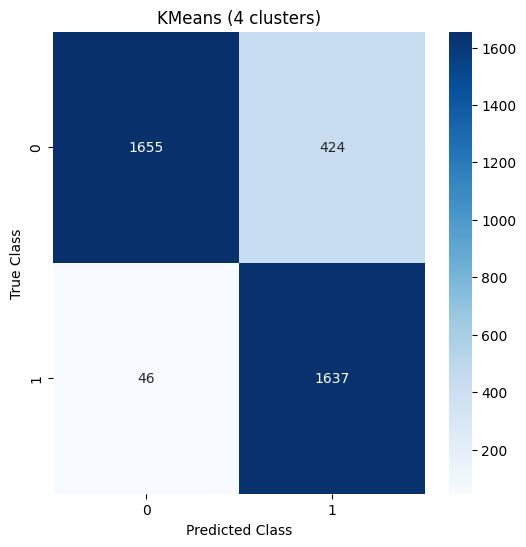

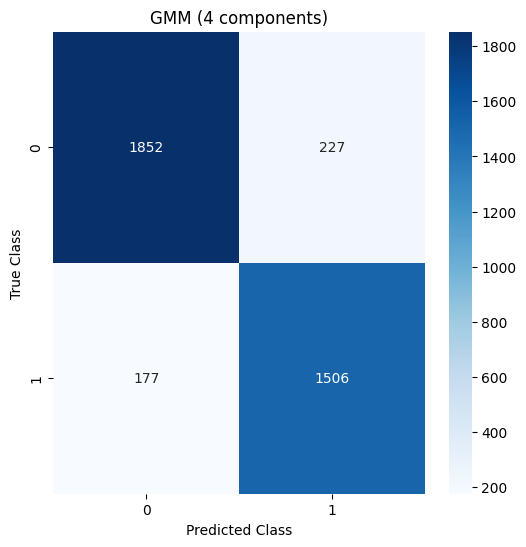

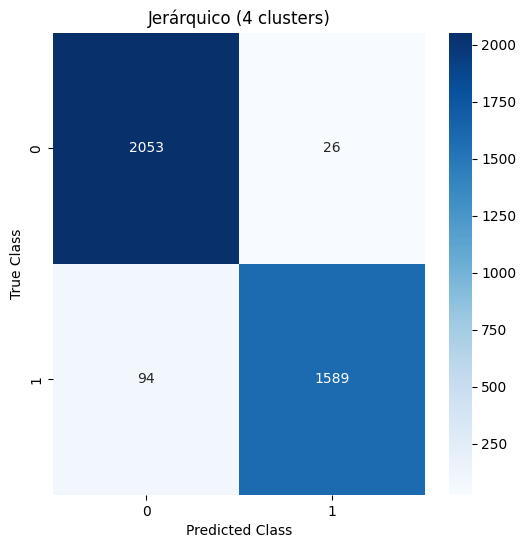

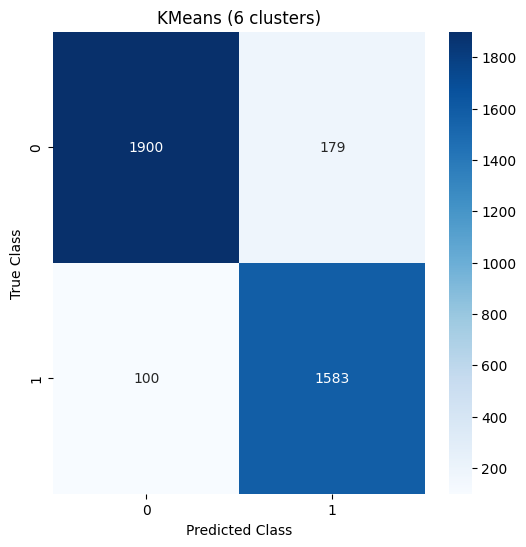

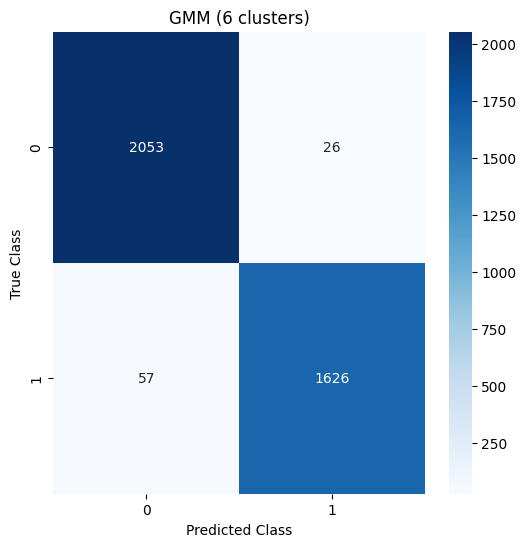

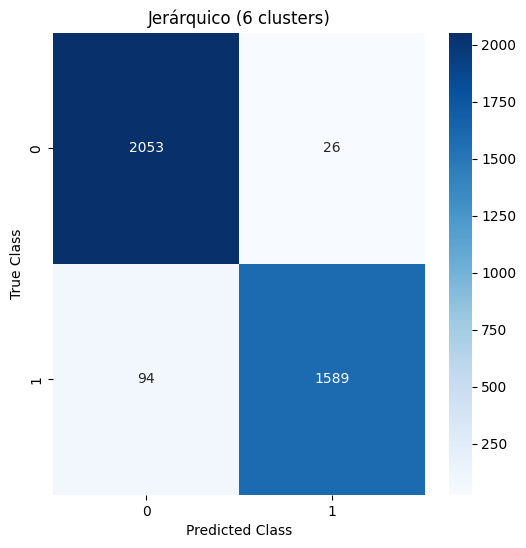

In [29]:
from scipy.optimize import linear_sum_assignment
# Crear DataFrame con resultados 
results_df = pd.DataFrame({
    'True_Class': ground_truth,
    'KMeans_4': labels_kmeans_4,
    'KMeans_6': labels_kmeans_6,
    'GMM_4': labels_gmm_4,
    'GMM_6': labels_gmm_6,
    'Hier_4': labels_hier_4,
    'Hier_6': labels_hier_6
})

# Función para mapear clusters
def map_clusters_to_classes(cluster_labels, true_labels):
    cluster_classes = []
    for cluster in np.unique(cluster_labels):
        class_counts = np.bincount(true_labels[cluster_labels == cluster])
        cluster_classes.append(np.argmax(class_counts))  
    return {cluster: cluster_classes[i] for i, cluster in enumerate(np.unique(cluster_labels))}

# Función para mostrar matrices como prefieres
def plot_simple_cm(true, pred, title):
    cm = confusion_matrix(true, pred, labels=np.unique(true))
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()
def map_6_to_2_clusters(cluster_labels, true_labels):
    cluster_classes = []
    for cluster in np.unique(cluster_labels):
        class_dist = true_labels[cluster_labels == cluster].value_counts(normalize=True)
        cluster_classes.append(class_dist.idxmax())
    return {cluster: cluster_classes[i] for i, cluster in enumerate(np.unique(cluster_labels))}

# Generar matrices para cada método

# KMeans 4 clusters
kmeans4_map = map_clusters_to_classes(results_df['KMeans_4'], results_df['True_Class'])
results_df['KMeans_4_mapped'] = results_df['KMeans_4'].map(kmeans4_map)
plot_simple_cm(results_df['True_Class'], results_df['KMeans_4_mapped'], 'KMeans (4 clusters)')

# GMM 4 clusters
gmm4_map = map_clusters_to_classes(results_df['GMM_4'], results_df['True_Class'])
results_df['GMM_4_mapped'] = results_df['GMM_4'].map(gmm4_map)
plot_simple_cm(results_df['True_Class'], results_df['GMM_4_mapped'], 'GMM (4 components)')

# Clustering Jerárquico 4 clusters
hier4_map = map_clusters_to_classes(results_df['Hier_4'], results_df['True_Class'])
results_df['Hier_4_mapped'] = results_df['Hier_4'].map(hier4_map)
plot_simple_cm(results_df['True_Class'], results_df['Hier_4_mapped'], 'Jerárquico (4 clusters)')

# KMeans 6 clusters
kmeans6_map = map_6_to_2_clusters(results_df['KMeans_6'], results_df['True_Class'])
results_df['KMeans_6_mapped'] = results_df['KMeans_6'].map(kmeans6_map)
plot_simple_cm(results_df['True_Class'], results_df['KMeans_6_mapped'], 'KMeans (6 clusters)')

# GMM 6 clusters
gmm6_map = map_6_to_2_clusters(results_df['GMM_6'], results_df['True_Class'])
results_df['GMM_6_mapped'] = results_df['GMM_6'].map(kmeans6_map)
plot_simple_cm(results_df['True_Class'], results_df['GMM_6_mapped'], 'GMM (6 clusters)')

# Matriz de confusión para Clustering Jerárquico 6 clusters
hier6_map = map_6_to_2_clusters(results_df['Hier_6'], results_df['True_Class'])
results_df['Hier_6_mapped'] = results_df['Hier_6'].map(hier6_map)
plot_simple_cm(results_df['True_Class'], results_df['Hier_6_mapped'], 'Jerárquico (6 clusters)')


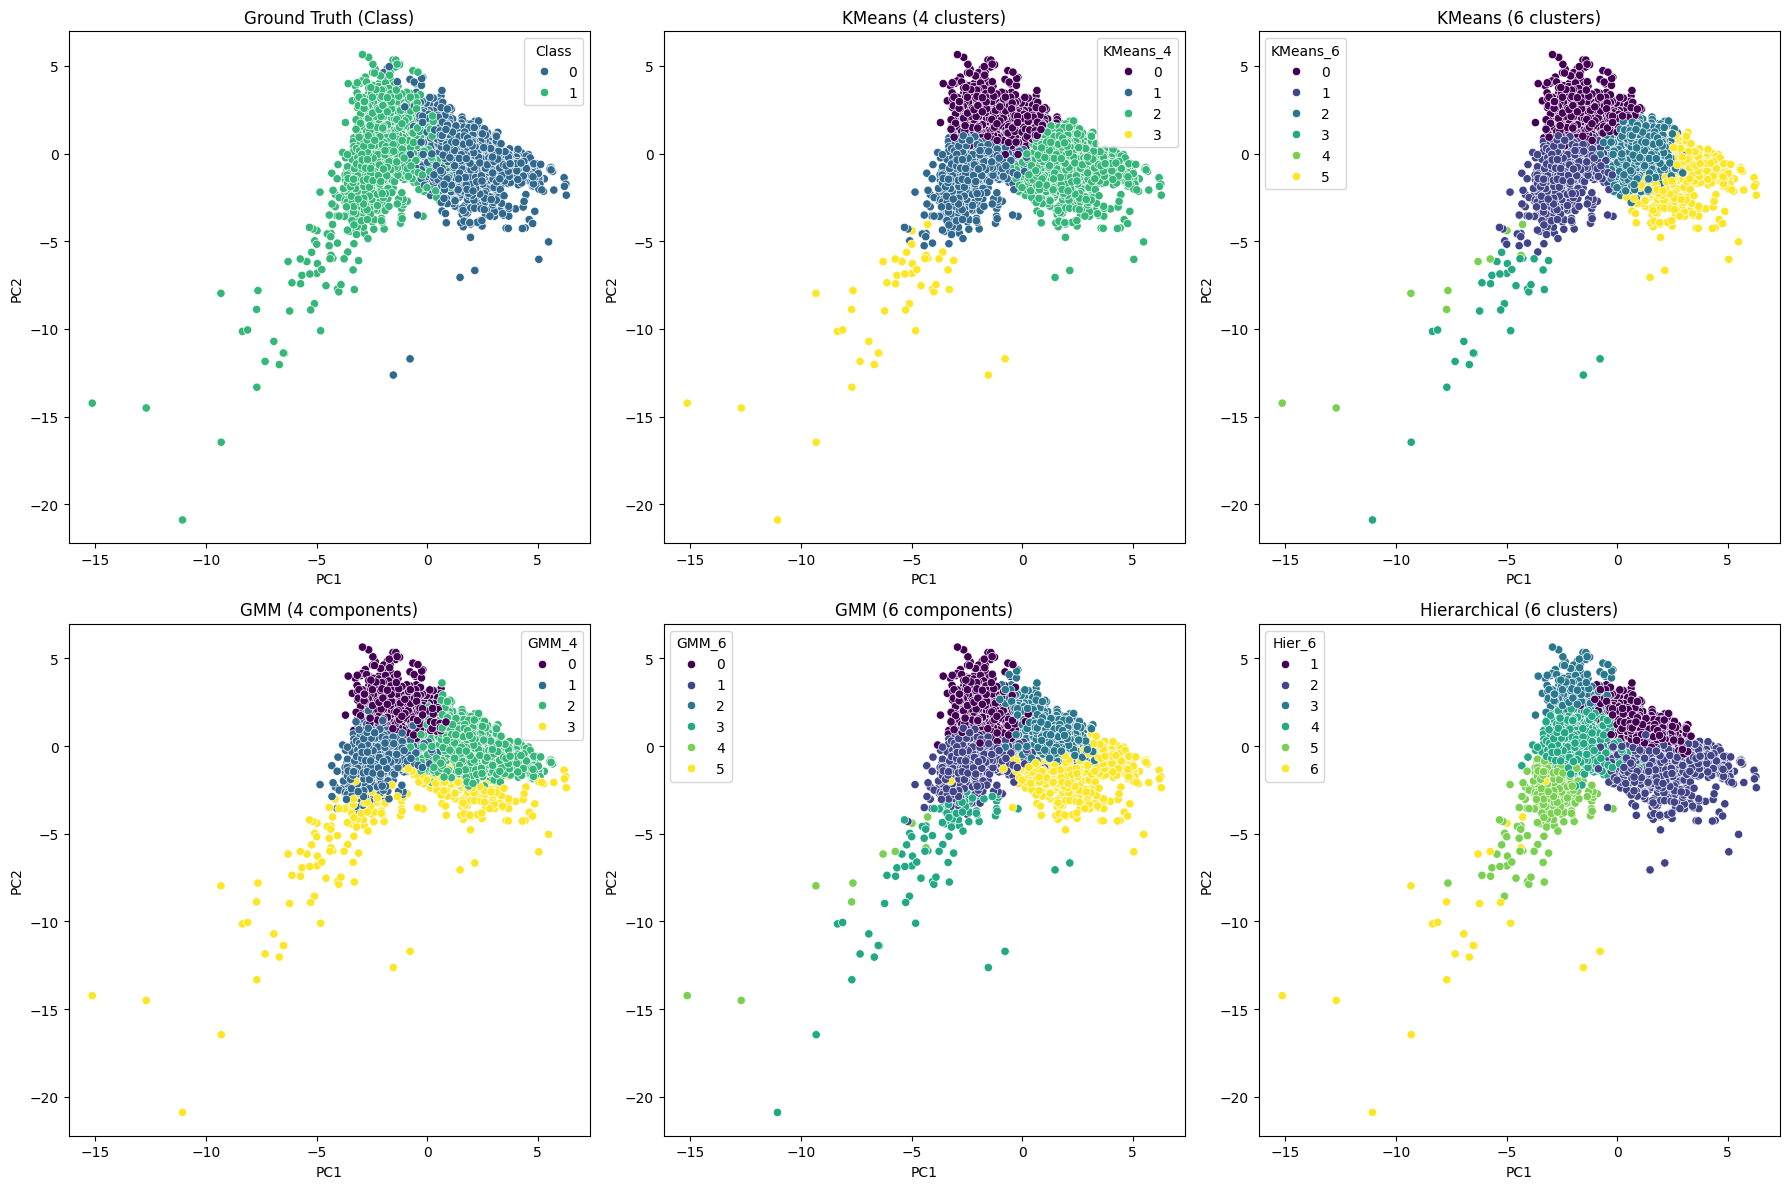

In [22]:
# Reducción a 2D para visualización
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_std)

# Crear DataFrame para facilitar el plotting
plot_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
plot_df['Class'] = ground_truth  # Con el ground_truth definido
plot_df['KMeans_4'] = labels_kmeans_4
plot_df['KMeans_6'] = labels_kmeans_6
plot_df['GMM_4'] = labels_gmm_4
plot_df['GMM_6'] = labels_gmm_6
plot_df['Hier_4'] = labels_hier_4
plot_df['Hier_6'] = labels_hier_6

def plot_all_clusters(df):
    plt.figure(figsize=(18, 12))
    
    # Ground Truth
    plt.subplot(2, 3, 1)
    sns.scatterplot(data=df, x='PC1', y='PC2', hue='Class', palette='viridis')
    plt.title('Ground Truth (Class)')
    
    # KMeans
    plt.subplot(2, 3, 2)
    sns.scatterplot(data=df, x='PC1', y='PC2', hue='KMeans_4', palette='viridis')
    plt.title('KMeans (4 clusters)')
    
    plt.subplot(2, 3, 3)
    sns.scatterplot(data=df, x='PC1', y='PC2', hue='KMeans_6', palette='viridis')
    plt.title('KMeans (6 clusters)')
    
    # GMM
    plt.subplot(2, 3, 4)
    sns.scatterplot(data=df, x='PC1', y='PC2', hue='GMM_4', palette='viridis')
    plt.title('GMM (4 components)')
    
    plt.subplot(2, 3, 5)
    sns.scatterplot(data=df, x='PC1', y='PC2', hue='GMM_6', palette='viridis')
    plt.title('GMM (6 components)')
    
    # Hierárquico
    plt.subplot(2, 3, 6)
    sns.scatterplot(data=df, x='PC1', y='PC2', hue='Hier_6', palette='viridis')
    plt.title('Hierarchical (6 clusters)')
    
    plt.tight_layout()
    plt.show()

plot_all_clusters(plot_df)

Recomiendo el método de KMeans con 4 clusters ya que en la matriz de confusión no presenta taaaantos errores seguido tal vez de el clustering jerárquico pero también por lo que se muestra en las plots, diría que la que más podría representar el análisis es el kmeans de 4 clusters. 

# De la previa investigación y su relación con la matriz de confusión

1. Precisión: De todos los casos que el modelo predijo como positivos, ¿cuántos realmente lo eran?
2. Exactitud (Acurracy): Porcentaje total de predicciones correctas (tanto positivas como negativas).
3. Sensibilidad (Recall): De todos los casos realmente positivos, ¿cuántos detectó el modelo?
4. F1-Score: Se emplea para equilibrar Precision y Recall, dando más peso a los valores bajos y evitando que uno domine sobre el otro.

La matriz de confusión desde mi perspectiva sirve para mostrar gráficamente estos conceptos, nos permite ver y comparar entre cada uno de los métodos usados, la matriz representa los VP (True Positives, FN (False Negatives), FP (False Positives) y VN (True Negatives) los cuales son los elementos que usan como base las 4 métricas. 

# A partir de los resultados de 2.B

In [52]:
# Calcular precision, accuracy, recall y f1-score
# Clustering Jerárquico
Z = linkage(x_std, 'ward')
labels_hier = fcluster(Z, t=2, criterion='maxclust') - 1  # Ajustar a [0, 1]

# Función para ajustar etiquetas si están invertidas y calcular métricas
def evaluate_clustering(y_true, labels, model_name):
    # Ajustar etiquetas si es necesario (KMeans/GMM pueden invertir 0 y 1)
    if np.mean(y_true == labels) < 0.5:
        labels = 1 - labels
    
    # Calcular métricas
    accuracy = accuracy_score(y_true, labels)
    precision = precision_score(y_true, labels)
    recall = recall_score(y_true, labels)
    f1 = f1_score(y_true, labels)
    
    print(f"\n--- {model_name} ---")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")

# 4. Evaluar cada modelo
evaluate_clustering(ground_truth, labels_kmeans, "KMeans")
evaluate_clustering(ground_truth, labels_gmm, "Gaussian Mixture")
evaluate_clustering(ground_truth, labels_hier, "Clustering Jerárquico")


--- KMeans ---
Accuracy:  0.9519
Precision: 0.9407
Recall:    0.9525
F1-Score:  0.9466

--- Gaussian Mixture ---
Accuracy:  0.9779
Precision: 0.9860
Recall:    0.9643
F1-Score:  0.9751

--- Clustering Jerárquico ---
Accuracy:  0.9681
Precision: 0.9839
Recall:    0.9441
F1-Score:  0.9636


El mejor es el Gaussian al parecer...